In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Uploading dataset
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
# Reading dataset
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


The datatype of Date column is object so we convert it into Datetime for visualization.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB


In [ ]:
# Summary Statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

There is no duplicate values in data.

In [ ]:
# Setting Date as Index
df.set_index('Date', inplace=True)

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


Exploratory Data Analysis

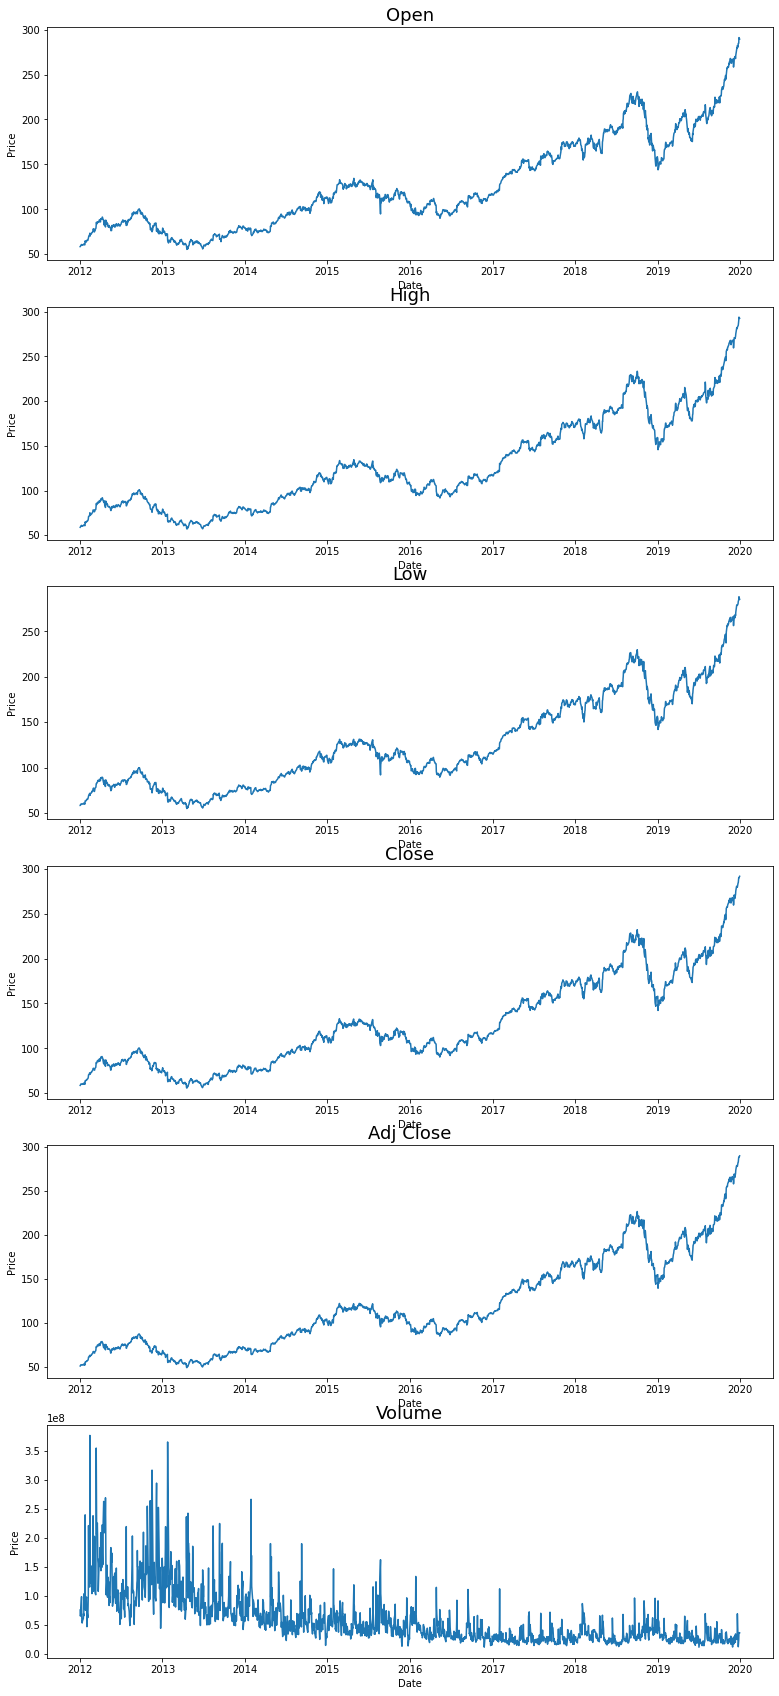

In [ ]:
# Lineplot
col_names = df.columns

fig = plt.figure(figsize=(13, 30))
for i in range(6):
    ax = fig.add_subplot(6,1,i+1)
    ax.plot(df.iloc[:,i],label=col_names[i])
    ax.set_title(col_names[i],fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
plt.show()

As there are quite similar values in open, high, low, close, and adj close columns, the line plot of these columns is also similar, we can see that there is an upward trend present . Hence the data is non stationary.

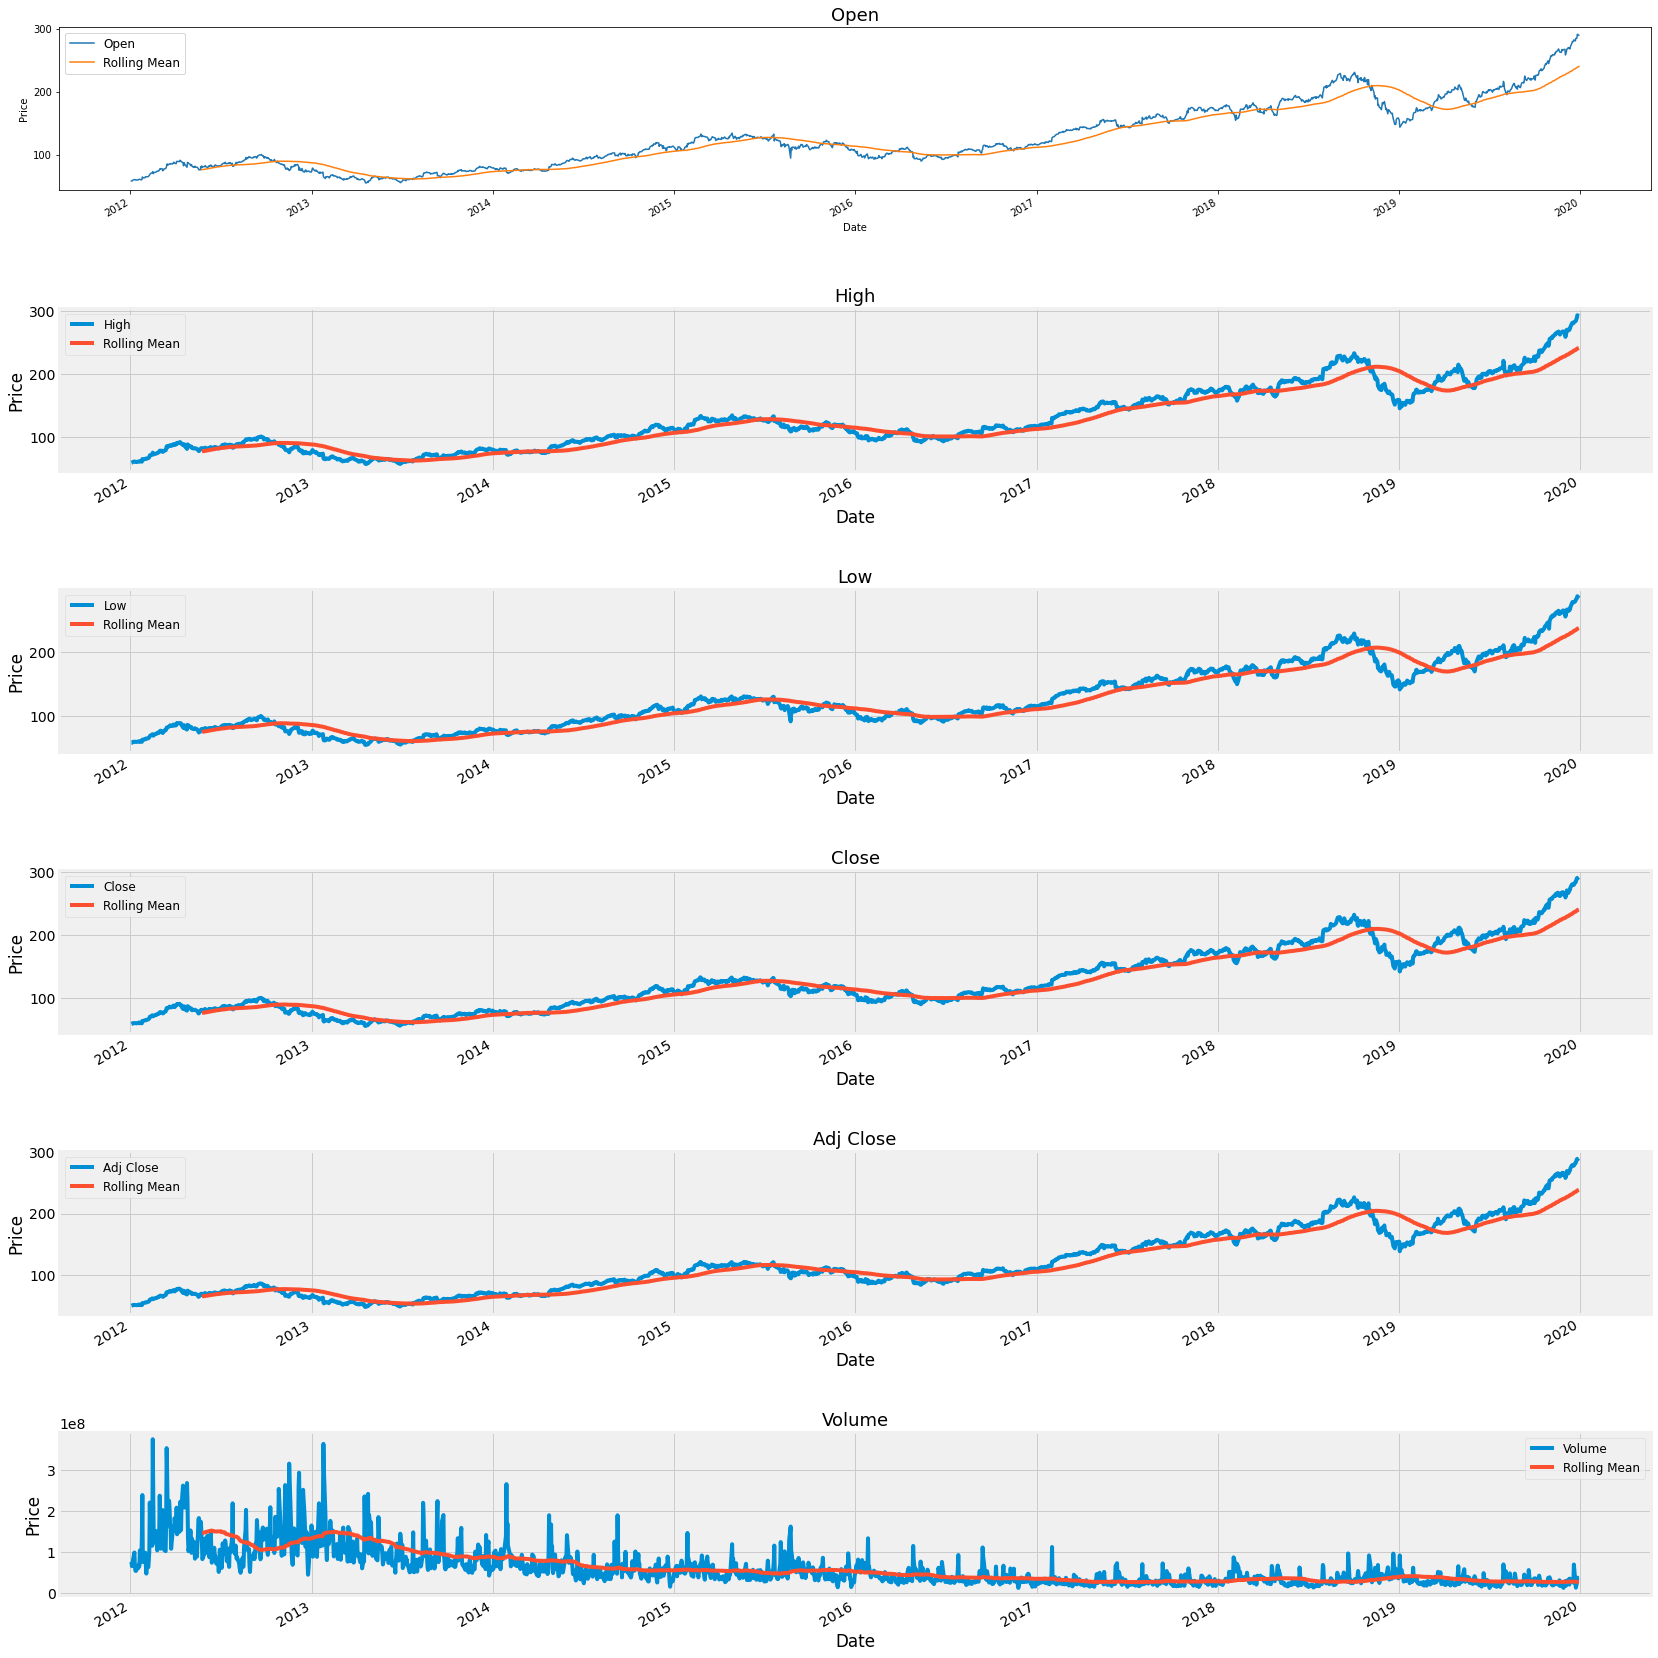

In [ ]:
# smoothing

col_names = df.columns
fig = plt.figure(figsize=(24, 24))
for i in range(6):
    ax = fig.add_subplot(6,1,i+1)
    ax.plot(df.iloc[:,i],label=col_names[i])
    df.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
    ax.set_title(col_names[i],fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.patch.set_edgecolor('black')
    plt.style.context('fivethirtyeight')
    plt.legend(prop={'size': 12})
    plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)
plt.show()

* From above plot,The rolling average has a smoother curve than the stock price curve.
* when price is above of the rolling mean,it is considered as uptrend while it is downtrend when price below of the rolling mean.



In [ ]:
# Analysis of relationship between variables
corr = df.corr()
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000


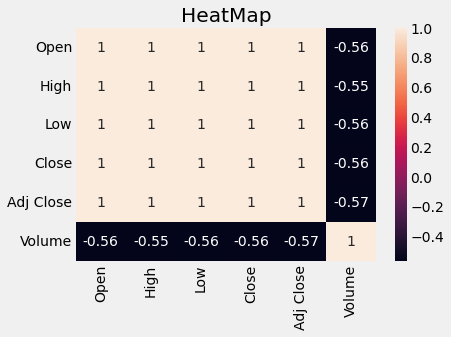

In [ ]:
# heatmap

sns.heatmap(corr , annot=True,)
plt.title('HeatMap')
plt.show();

* We eliminate the features like Open,Low, High, Adj close as they are highly multicollinear with close.
* We consider close our target variable.(Because stock's closing price is the standard benchmark used by investors to track its performance over time)



In [ ]:
# dropping unnecessary columns
aapl= df.drop(axis=1,labels=['Open','High','Low','Adj Close','Volume'])
aapl

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2019-12-23,284.000000
2019-12-24,284.269989
2019-12-26,289.910004


In [ ]:
# Downsampling data to month wise (to inspect how data behaves differently under different frequency)

monthly_mean = aapl['Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
monthly_data

,Close
Date,
2012-01-31,61.225428
2012-02-29,71.081572
2012-03-31,82.501104
2012-04-30,86.571857
2012-05-31,80.667597
...,...
2019-08-31,204.957728
2019-09-30,217.994999
2019-10-31,235.286521


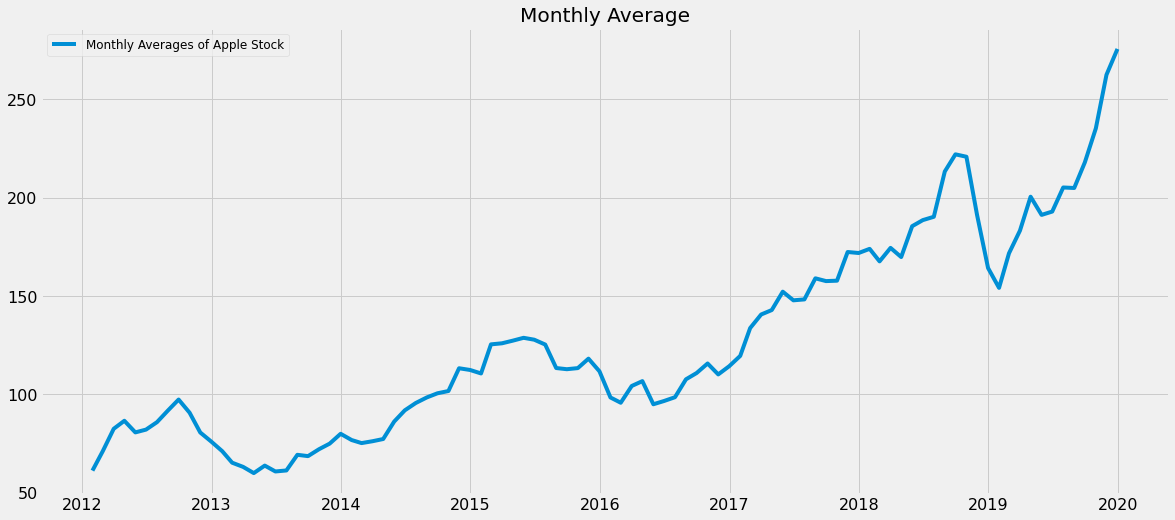

In [ ]:
# Monthly Stock Price

fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Close'],label='Monthly Averages of Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.title('Monthly Average')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show();

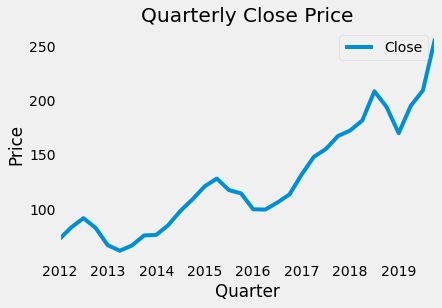

In [ ]:
# Quarterly Closing Price
df_quarterly_sum = aapl.resample('Q').mean()
df_quarterly_sum.plot();
plt.title('Quarterly Close Price')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid();

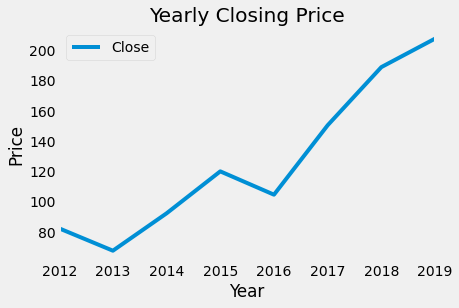

In [ ]:
# Yearly Closing Price
df_yearly_sum = aapl.resample('A').mean()
df_yearly_sum.plot();
plt.title('Yearly Closing Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid();

In [ ]:
# separating monthly data Index wise

monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Close,Year,Month,dayofweek,quarter
Date,,,,,
2012-01-31,61.225428,2012,January,Tuesday,1
2012-02-29,71.081572,2012,February,Wednesday,1
2012-03-31,82.501104,2012,March,Saturday,1
2012-04-30,86.571857,2012,April,Monday,2
2012-05-31,80.667597,2012,May,Thursday,2
...,...,...,...,...,...
2019-08-31,204.957728,2019,August,Saturday,3
2019-09-30,217.994999,2019,September,Monday,3
2019-10-31,235.286521,2019,October,Thursday,4


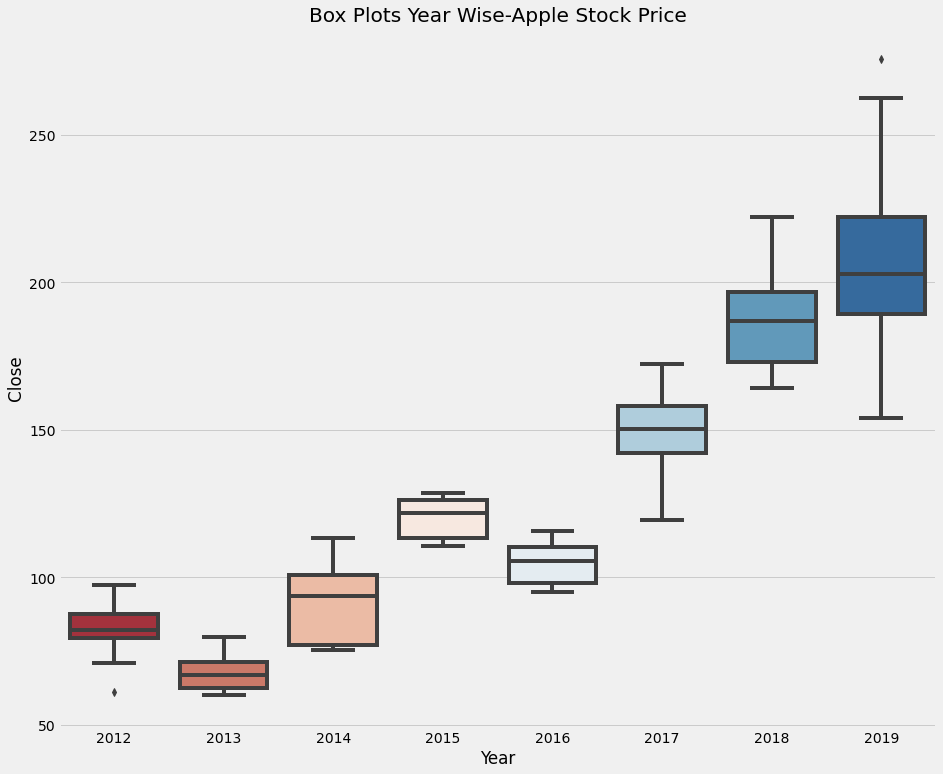

In [ ]:
# Plotting boxplot year wise

plt.figure(figsize=(14,12))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

* Outliers present in 2012 and 2019
* Lots of variability in 2014 and 2019
* Upward rising trend is shown
* 2019 most volatile year among all years

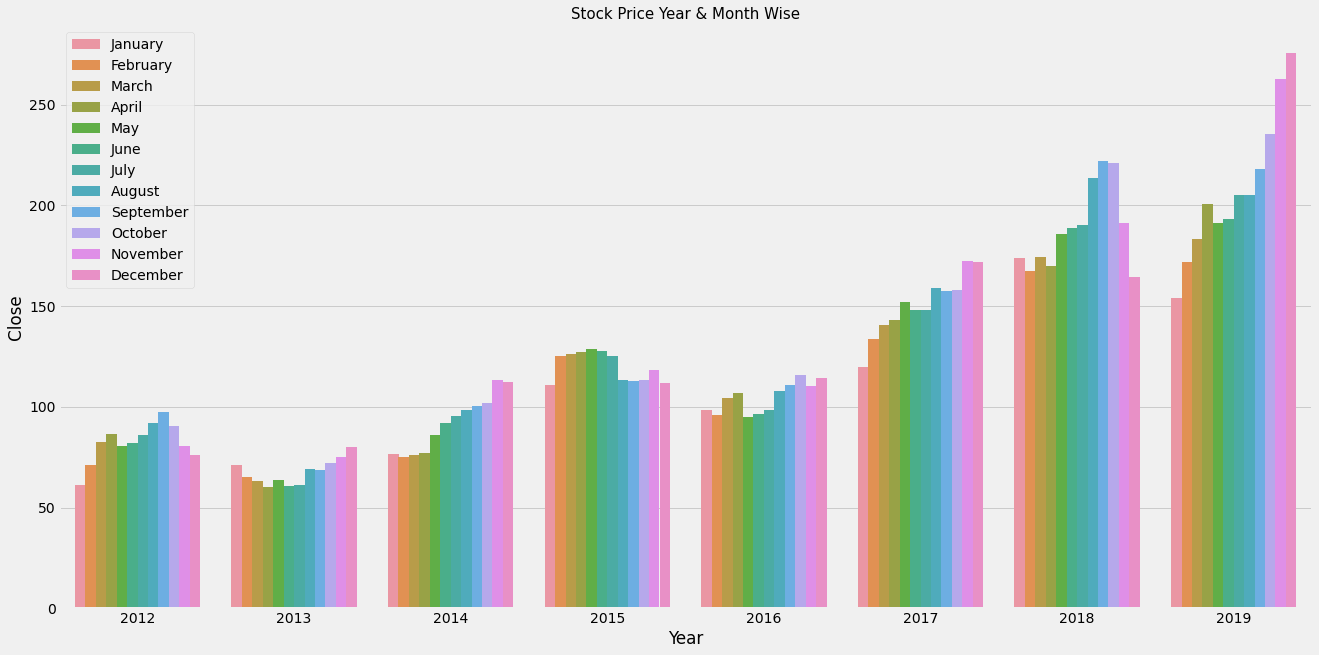

In [ ]:
# Plotting stock price year and month wise

fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Price Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show();

Above figure shows that the Period from July-September seems to push stock price above in comparision to other months.

Decomposition of Time Series

In [ ]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Figure size 1440x1440 with 0 Axes>

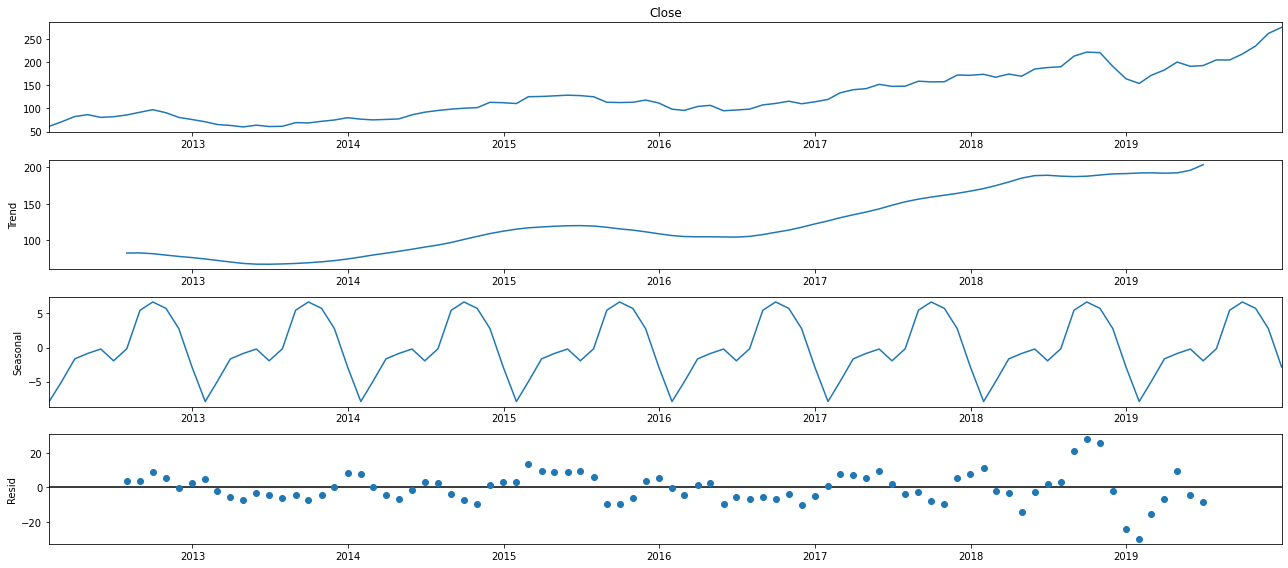

In [ ]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,20))
decomposed_series = seasonal_decompose(monthly_data['Close'],model='additive')
decomposed_series.plot()
plt.show();

In [ ]:
test_result = adfuller(aapl['Close'])

In [ ]:
def adfuller_test(X):
    result=adfuller(aapl['Close'])
    labels=['ADF test statistics','p-value','#Lags used','no.of observation used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
        print("Stronge evidence against the null hypothesis(Ho),reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against the null hypothesis(Ho),time series has a unit root and indicating it has non-stationary")

In [ ]:
adfuller_test(aapl['Close'])

ADF test statistics : 1.2193701254378013
p-value : 0.9961170178032009
#Lags used : 9
no.of observation used : 2001
weak evidence against the null hypothesis(Ho),time series has a unit root and indicating it has non-stationary


In [ ]:
aapl.head()

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


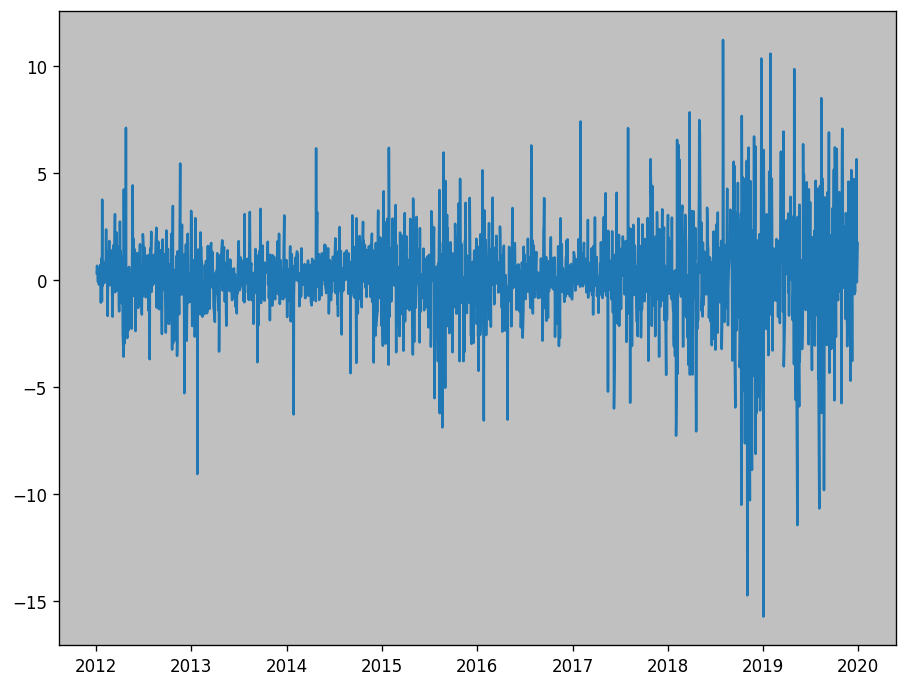

In [ ]:
ax = plt.axes()
series2 = aapl.Close.diff().dropna() #first order differenced series
ax.set_facecolor('silver')
plt.plot(series2)

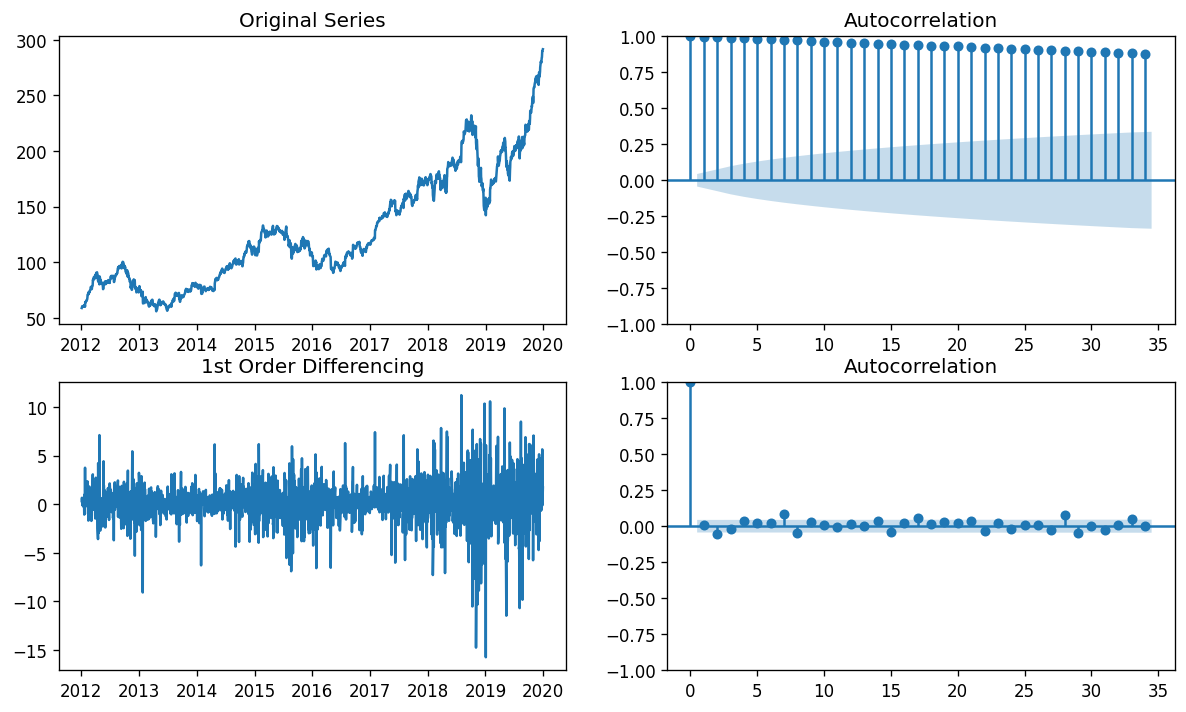

In [ ]:
plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(aapl['Close']);
axes[0, 0].set_title('Original Series')
plot_acf(aapl['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(series2);
axes[1, 0].set_title('1st Order Differencing')
plot_acf(series2, ax=axes[1, 1])
plt.show()

d=1

In [ ]:
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(aapl.Close)
print('p-value: ', result1[1])
if result1[1]<=0.05:
        print("Stronge evidence against the null hypothesis(Ho),reject the null hypothesis.Data has no unit root and is stationary")
else:
        print("weak evidence against the null hypothesis(Ho),time series has a unit root and indicating it has non-stationary")

result2 = adfuller(aapl.Close.diff().dropna())
print('p-value: ', result2[1])
if result2[1]<=0.05:
        print("Stronge evidence against the null hypothesis(Ho),reject the null hypothesis.Data has no unit root and is stationary")
else:
        print("weak evidence against the null hypothesis(Ho),time series has a unit root and indicating it has non-stationary")

p-value:  0.9961170178032009
weak evidence against the null hypothesis(Ho),time series has a unit root and indicating it has non-stationary
p-value:  1.7631231987209532e-25
Stronge evidence against the null hypothesis(Ho),reject the null hypothesis.Data has no unit root and is stationary


In [ ]:
import warnings
warnings.filterwarnings('ignore')

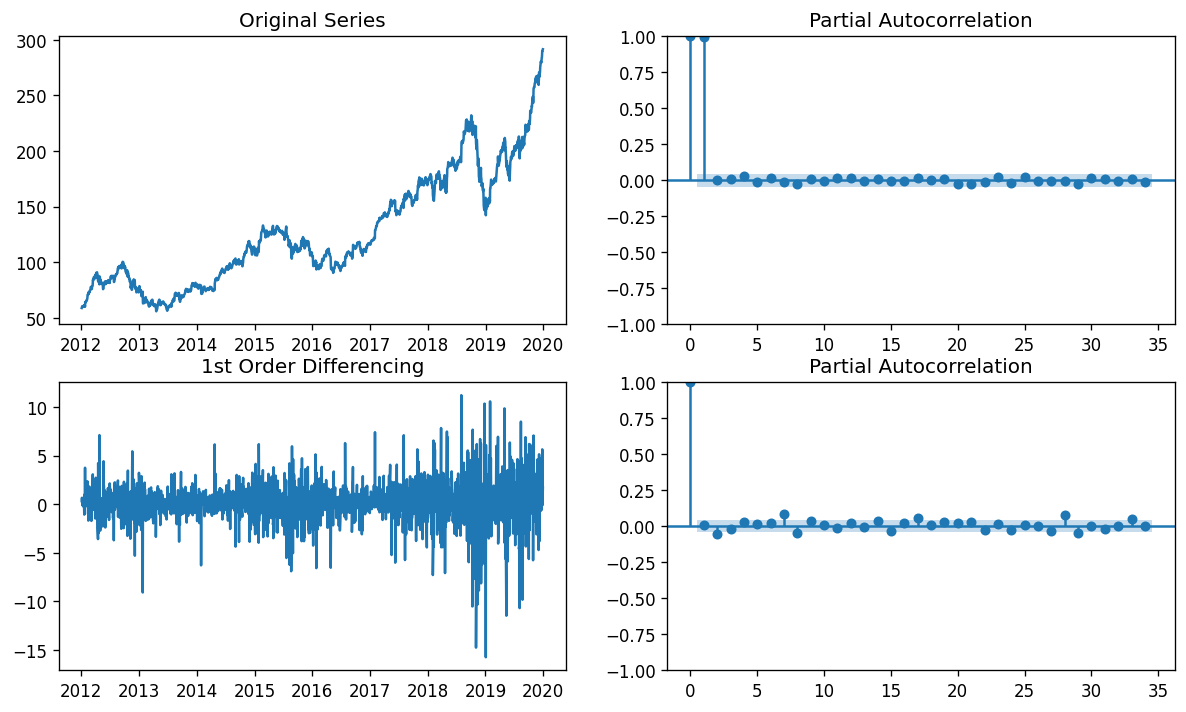

In [ ]:
plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(aapl['Close']);
axes[0, 0].set_title('Original Series')
plot_pacf(aapl['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(series2);
axes[1, 0].set_title('1st Order Differencing')
plot_pacf(series2, ax=axes[1, 1])
plt.show()

We see that the first lag which is significant p=1

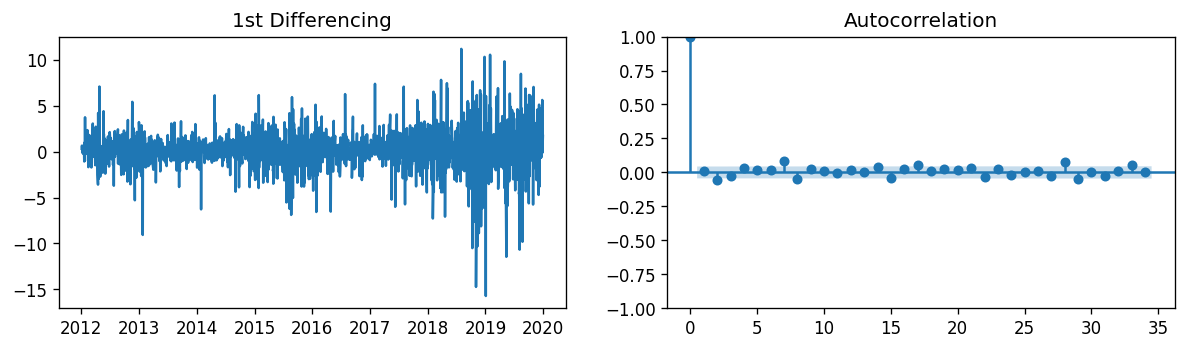

In [ ]:
#Find q in MA(q)
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2)
axes[0].plot(series2);
axes[0].set_title('1st Differencing')
plot_acf(series2, ax=axes[1])
plt.show()

# q=0

In [ ]:
train_data = aapl.iloc[aapl.index < "2019-01-01"]
test_data = aapl.iloc[aapl.index >= "2019-01-01"]

In [ ]:
train_data

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2018-12-24,146.830002
2018-12-26,157.169998
2018-12-27,156.149994


In [ ]:
!pip install statsmodels==0.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.10.1 requires statsmodels>=0.13.2, but you have statsmodels 0.12.2 which is incompatible.


In [ ]:
# ARIMA(p,d,q) Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,1,0))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1760
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3640.858
Date:                Mon, 03 Apr 2023   AIC                           7285.716
Time:                        09:26:36   BIC                           7296.661
Sample:                             0   HQIC                          7289.761
                               - 1760                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0319      0.015      2.060      0.039       0.002       0.062
sigma2         3.6759      0.061     60.546      0.000       3.557       3.795
Ljung-Box (L1) (Q):                   0.00   Jarque-

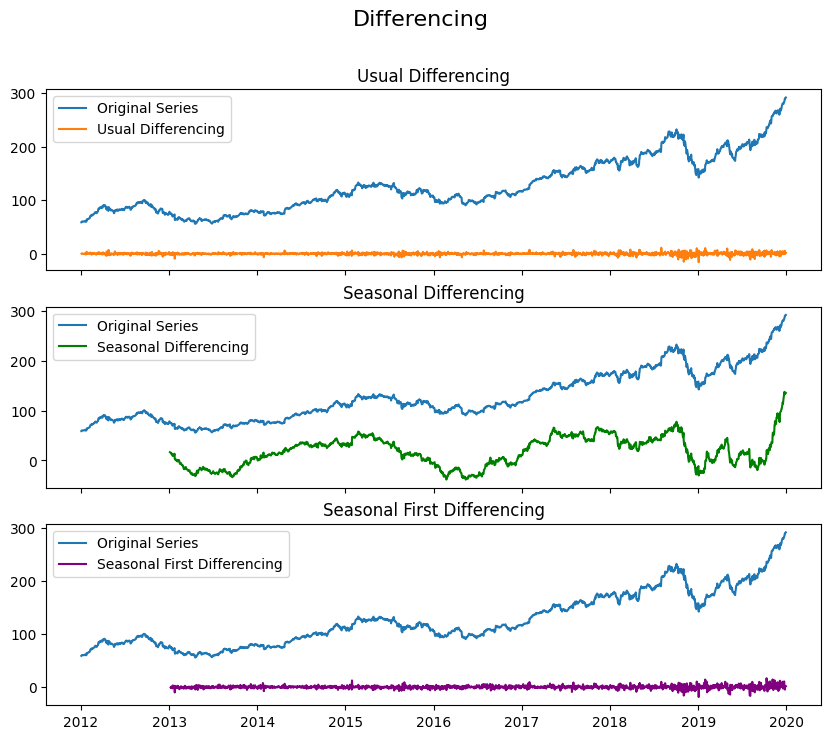

In [ ]:
# Plot
fig, axes = plt.subplots(3, 1, figsize=(10,8), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(aapl.Close, label='Original Series')
axes[0].plot(aapl.Close.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)
aapl_Close_diff = aapl.Close.diff(1)

# Seasonal Diff
axes[1].plot(aapl.Close, label='Original Series')
axes[1].plot(aapl.Close.diff(252), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
axes[1].legend(loc='upper left', fontsize=10)

# Seasinal first differencing
axes[2].plot(aapl.Close, label='Original Series')
axes[2].plot(aapl_Close_diff.diff(252), label='Seasonal First Differencing', color='purple')
axes[2].set_title('Seasonal First Differencing')
axes[2].legend(loc='upper left', fontsize=10)
plt.suptitle('Differencing', fontsize=16)
plt.show()


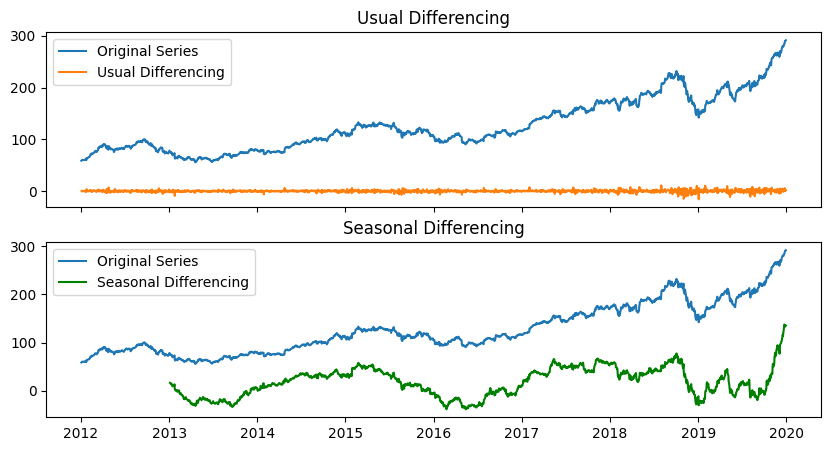

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(10,5),dpi=100,sharex=True)
# Usual Differencing
axes[0].plot(aapl.Close,label='Original Series')
axes[0].plot(aapl.Close.diff(),label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left',fontsize=10)

# Seasonal Differencing
axes[1].plot(aapl.Close,label='Original Series')
axes[1].plot(aapl.Close.diff(252),label='Seasonal Differencing',color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left',fontsize=10)
plt.show();

In [ ]:
from statsmodels.tsa.stattools import adfuller
result3 = adfuller(aapl.Close)
print('p-value: ', result3[1])
if result3[1]<=0.05:
        print("Stronge evidence against the null hypothesis(Ho),reject the null hypothesis.Data has no unit root and is stationary")
else:
        print("weak evidence against the null hypothesis(Ho),time series has a unit root and indicating it has non-stationary")

result4 = adfuller(aapl_Close_diff.diff(252).dropna())
print('p-value: ', result4[1])
if result4[1]<=0.05:
        print("Stronge evidence against the null hypothesis(Ho),reject the null hypothesis.Data has no unit root and is stationary")
else:
        print("weak evidence against the null hypothesis(Ho),time series has a unit root and indicating it has non-stationary")

p-value:  0.9961170178032009
weak evidence against the null hypothesis(Ho),time series has a unit root and indicating it has non-stationary
p-value:  9.726809267881141e-10
Stronge evidence against the null hypothesis(Ho),reject the null hypothesis.Data has no unit root and is stationary


Text(0.5, 1.0, 'PACF of Differenced Series')

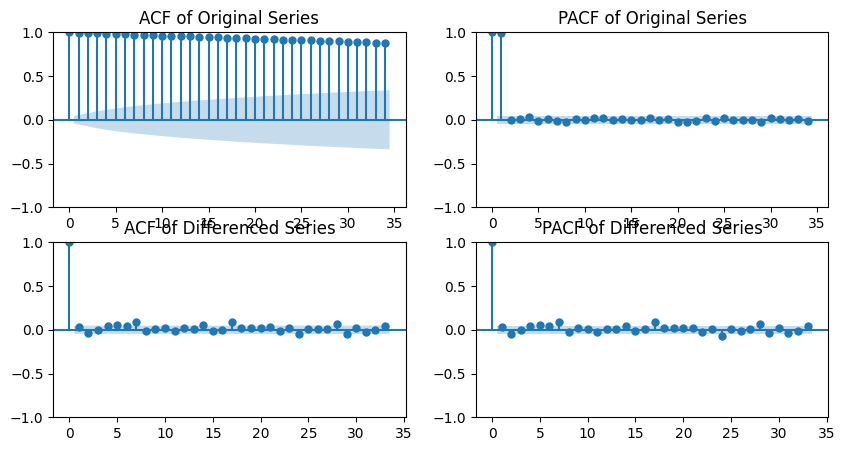

In [ ]:
# Original Series
fig, axes = plt.subplots(2, 2, figsize=(10,5))
plot_acf(aapl.Close, ax=axes[0,0]); axes[0,0].set_title('ACF of Original Series')
plot_pacf(aapl.Close, ax=axes[0,1]); axes[0,1].set_title('PACF of Original Series')

# Differencing
plot_acf(aapl_Close_diff.diff(252).dropna().dropna(), ax=axes[1,0]); axes[1,0].set_title('ACF of Differenced Series')

plot_pacf(aapl_Close_diff.diff(252).dropna(), ax=axes[1,1]); axes[1,1].set_title('PACF of Differenced Series')

Simple Average Method

In [ ]:
y_avg = test_data.copy()
y_avg['avg_forecast'] = train_data['Close'].mean()

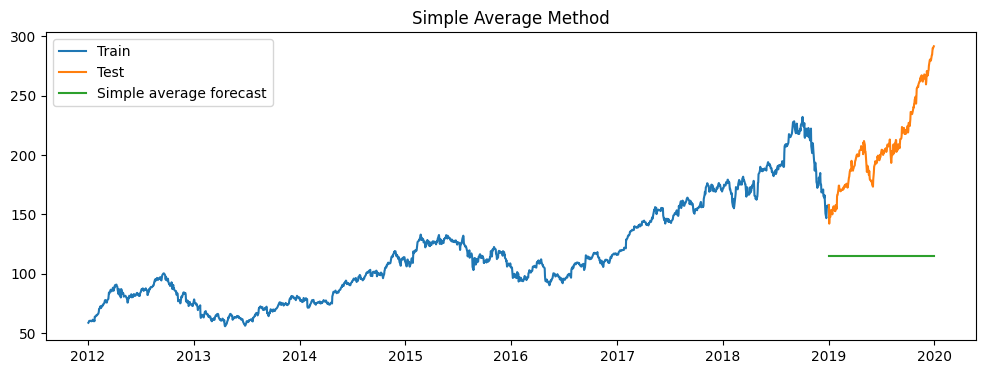

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Close'], label = 'Train')
plt.plot(test_data['Close'],label ='Test')
plt.plot(y_avg['avg_forecast'], label ='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data['Close'],y_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Close']-y_avg['avg_forecast'])/test_data['Close'])*100,2)

tempresults = pd.DataFrame({'Method':['Simple Average method'],
                           'RMSE':[rmse], 'MAPE':[mape]})
#results = pd.concat([results,tempResults])
#results = results [['Method','RMSE','MAPE']]
#results
tempresults

,Method,RMSE,MAPE
0,Simple Average method,98.83,43.16


Holts Method with Trend

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(np.asarray(train_data['Close']),seasonal_periods = 252,trend ='Additive',
                             seasonal = None)
model_fit = model.fit(optimized = True)
model_fit.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 3.612806758983671e-11,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 58.69084083938759,
 'initial_trend': 0.05627787036531124,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
y_holt =test_data.copy()
y_holt['holt_forecast'] = model_fit.forecast(len(test_data))

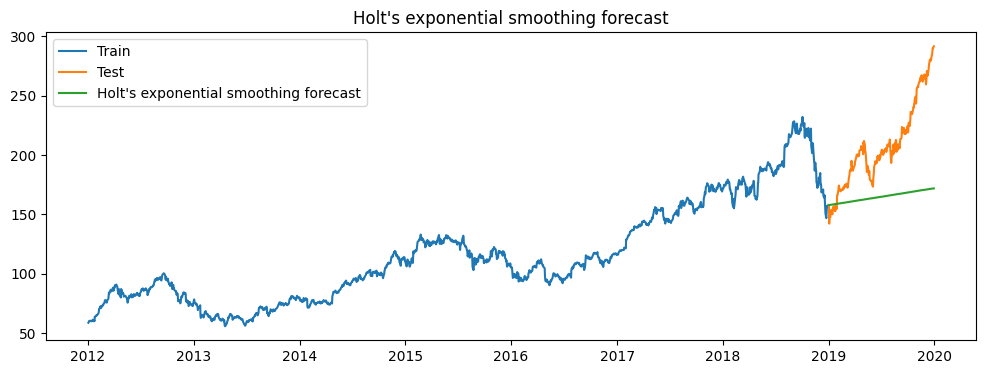

In [ ]:
#plotting
plt.figure(figsize =(12,4))
plt.plot(train_data['Close'],label ='Train')
plt.plot(test_data['Close'],label ='Test')
plt.plot(y_holt['holt_forecast'],label = 'Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title ('Holt\'s exponential smoothing forecast')
plt.show()

In [ ]:
#calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_data['Close'],y_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Close']-y_holt['holt_forecast'])/test_data['Close'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'],'RMSE':[rmse],'MAPE':[mape]})
tempResults

,Method,RMSE,MAPE
0,Holt's exponential smoothing method,52.7,19.48


Holts winters additive method with trend and seasonality

In [ ]:
y_hwa = test_data.copy()
model = ExponentialSmoothing(np.asarray(train_data['Close']),seasonal_periods = 252 ,trend ='add',
                             seasonal ='add')
model_fit =  model.fit(optimized = True)
model_fit.params

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.999993930188222,
 'smoothing_trend': 9.678422531270288e-07,
 'smoothing_seasonal': 3.1638223756418456e-06,
 'damping_trend': nan,
 'initial_level': 64.7663383282717,
 'initial_trend': 0.05679132608231529,
 'initial_seasons': array([-6.05019997, -6.48423889, -5.51481774, -5.51794739, -5.48004004,
        -5.53313716, -5.65917439, -6.02470045, -5.91293154, -5.93850126,
        -5.90980886, -4.68376484, -5.23083658, -6.70361217, -8.45542804,
        -8.18314579, -7.42923688, -7.82355999, -6.72451108, -7.51817193,
        -7.98714096, -6.87121179, -7.15970597, -7.1947442 , -6.35557023,
        -4.81960027, -4.10870943, -2.85424426, -1.54625955, -1.78768704,
        -2.36712293, -2.39264088, -2.18603896, -1.41550726, -1.66032765,
        -1.42237246, -1.57790143, -1.06515902, -0.99278221, -0.85097413,
        -0.79408942, -1.31332998, -1.36127818, -1.41412395, -1.24279638,
        -1.03112994, -1.50003394, -0.74529632,  0.21470515,  0.60687222,
         0.49977428, -0.

In [ ]:
y_hwa['hw_forecast'] = model_fit.forecast(test_data.shape[0])

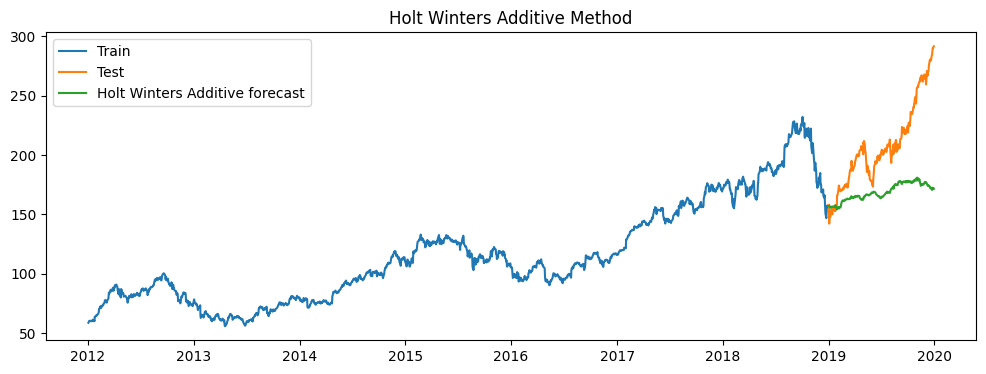

In [ ]:
#plotting
plt.figure(figsize =(12,4))
plt.plot(train_data['Close'],label ='Train')
plt.plot(test_data['Close'],label ='Test')
plt.plot(y_hwa['hw_forecast'],label = 'Holt Winters Additive forecast')
plt.legend(loc='best')
plt.title ('Holt Winters Additive Method')
plt.show()

In [ ]:
#calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_data['Close'],y_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Close']-y_hwa['hw_forecast'])/test_data['Close'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters Additive method'],'RMSE':[rmse],'MAPE':[mape]})
tempResults

,Method,RMSE,MAPE
0,Holt Winters Additive method,48.73,17.6


Holt Winters Multiplicative Method with trend and seasonality

In [ ]:
y_hwm = test_data.copy()
model = ExponentialSmoothing(np.asarray(train_data['Close']),seasonal_periods = 252 ,
                             trend ='add',seasonal ='mul')
model_fit = model.fit(optimized = True)
model_fit.params

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.9950034969085979,
 'smoothing_trend': 9.99526100499945e-05,
 'smoothing_seasonal': 9.986011696713179e-05,
 'damping_trend': nan,
 'initial_level': 82.19889267924619,
 'initial_trend': 0.05050543214267813,
 'initial_seasons': array([0.97411465, 0.97326602, 0.98417637, 0.98585781, 0.98826746,
        0.99043635, 0.99015728, 0.99068349, 0.99184595, 0.99193134,
        0.99119179, 1.00253713, 0.99661638, 0.98381765, 0.96910246,
        0.96826189, 0.9750227 , 0.97178547, 0.9831561 , 0.97108821,
        0.96567484, 0.97951121, 0.9750602 , 0.97153899, 0.97952902,
        0.99626862, 1.0035645 , 1.0165842 , 1.03142746, 1.0291434 ,
        1.02510535, 1.02610715, 1.03085968, 1.03841748, 1.03849109,
        1.0408167 , 1.03856659, 1.04191279, 1.04325447, 1.04549857,
        1.04453602, 1.04018489, 1.04169664, 1.04242258, 1.04428067,
        1.04507798, 1.04016464, 1.04778147, 1.05506896, 1.05578549,
        1.05610242, 1.04379738, 1.0475809 , 1.04069131, 1.04864584,
      

In [ ]:
y_hwm['hw_forecast'] = model_fit.forecast(test_data.shape[0])

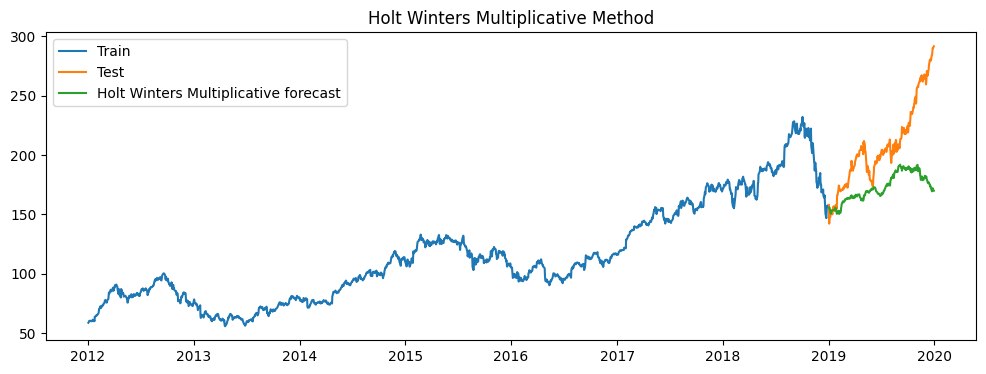

In [ ]:
#plotting
plt.figure(figsize =(12,4))
plt.plot(train_data['Close'],label ='Train')
plt.plot(test_data['Close'],label ='Test')
plt.plot(y_hwm['hw_forecast'],label = 'Holt Winters Multiplicative forecast')
plt.legend(loc='best')
plt.title ('Holt Winters Multiplicative Method')
plt.show()

In [ ]:
#calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_data['Close'],y_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Close']-y_hwm['hw_forecast'])/test_data['Close'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters Multiplicative method'],'RMSE':[rmse],'MAPE':[mape]})
tempResults

,Method,RMSE,MAPE
0,Holt Winters Multiplicative method,44.86,15.7
